# Caelan Osman
# Homework 19.2
# March 29, 2022

In [26]:
import keras
import time
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [35]:
def prepare_data():
    """
    This function prepares the data for training
    """
    (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
    # Rescale the inputs to be in the interval [-0.5,0.5], 
    X_train_full = X_train_full/255 - 0.5  # Rescale the training set input
    X_test = X_test/255  - 0.5   # Apply the same transform to the test set

    # make a validation split beyond the basic test/train
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.2, 
                                                      random_state=42)
    
    return X_train, X_val, y_train, y_val, X_test, y_test

   
def build_varying_layers_model(widths=[]):
    """
    This function builds a model with the given widths for the dense layers
    """
    # add initial layers
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    

    # add as many dense layers as we want
    for w in widths:
        model.add(keras.layers.Dense(w, activation="relu"))
        
    # add softmax layer
    model.add(keras.layers.Dense(10, activation="softmax"))
    

    return model
    
def set_optimizer(learning_rate=0.2, decay=1e-4, momentum=0.8, nesterov=False, Adam=False):
    """
    This function returns the appropriate optimizer
    """
    if Adam:
        return keras.optimizers.Adam(lr=learning_rate)
    else:
        ## Learning rate with decay
        ## decay works as   lr *= (1. / (1. + decay * iterations))
        opt = tf.keras.optimizers.SGD(learning_rate = learning_rate, 
                                      decay=decay, 
                                      momentum=momentum, 
                                      nesterov=nesterov)
        
        return opt
    
def train_models(model, opt, X_val, y_val,  batch_size=32, epochs=10, verbose=0):
    """
    This function trains the model
    """
    model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=opt,
                      metrics=["accuracy"])
    
    history = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=verbose,
                    validation_data=(X_val, y_val)
                   )
    return model, history


def plot_history(history, title=""):
    """
    This function plots the history
    """
    # Plot the history
    plt.figure(figsize=(8,4),dpi=100)

    ax = plt.subplot(1,2,1)
    ax.plot(history.history['accuracy'], label='training accuracy')
    ax.plot(history.history['val_accuracy'], label='validation accuracy')
    ax.grid(True, alpha=0.2)
    ax.legend(frameon=False)
    ax.set_xlabel('Epoch')
    ax.grid(True, alpha=0.3)

    ax = plt.subplot(1,2,2)
    ax.plot(history.history['loss'], label='training loss')
    ax.plot(history.history['val_loss'], label='validation loss')
    ax.legend(frameon=False)
    ax.set_xlabel('Epoch')
    ax.grid(True, alpha=0.3)
    #plt.ylim(0,1);
    
    plt.suptitle(title)
    plt.show()
    
    return

## Exercise 19.5

### Different layer widths

375/375 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8723


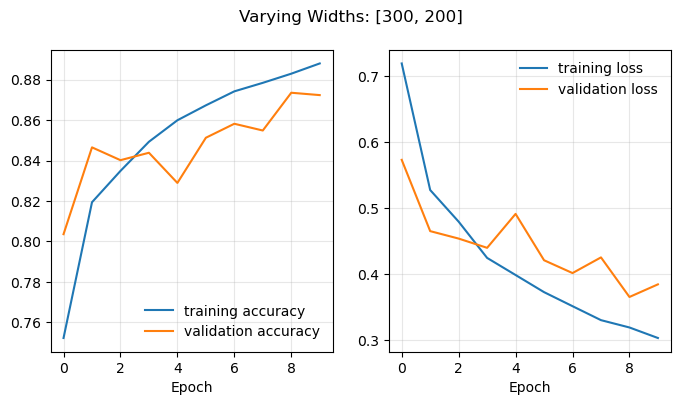

375/375 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8697


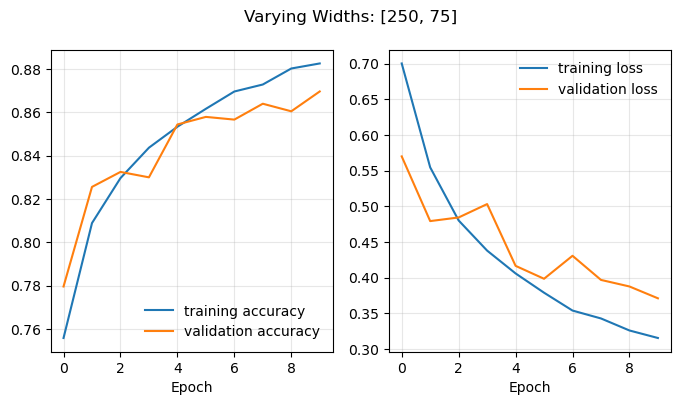

375/375 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8625


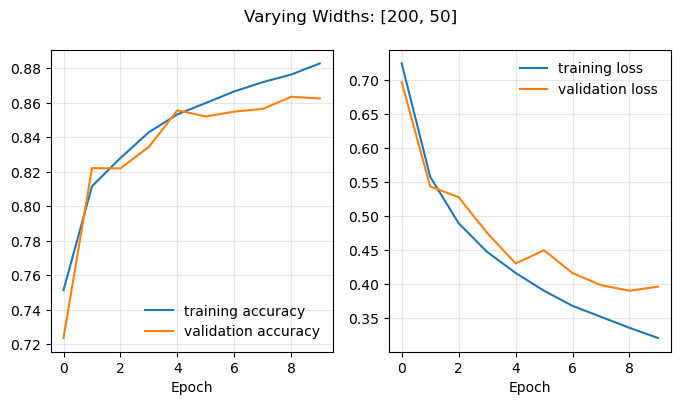

In [36]:
def models_varying_widths():
    """
    Vary widths of layers
    """
    
    # get data
    X_train, X_val, y_train, y_val, X_test, y_test = prepare_data()
    
    # models with varying widths
    widths = [[300, 200], [250, 75], [200, 50]]
    models = [build_varying_layers_model(widths=width) for width in widths]
    optimizers = [set_optimizer() for _ in widths]
    histories = []
    times = []
    accuracy_loss = []
    
    for i in range(len(models)):
        # get model and history and training time as well as accuracy and loss on validation set
        start = time.time()
        model, history = train_models(models[i], optimizers[i], X_val, y_val)
        end = time.time()
        times.append(end - start)
        
        histories.append(history)
        models[i] = model
        accuracy_loss.append(model.evaluate(X_val, y_val))
        
        # plot histories
        plot_history(history, title='Varying Widths: ' + str(widths[i]))
    
    return widths, models, optimizers, histories, times, accuracy_loss

varying_widths, models_widths, opt_widths, hist_widths, times_widths, accuracy_widths = models_varying_widths()

### Different number of layers

375/375 [==============================] - 1s 2ms/step - loss: 0.3751 - accuracy: 0.8667


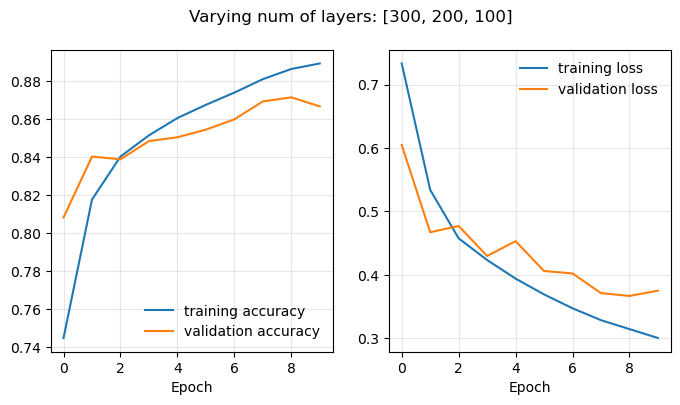

375/375 [==============================] - 1s 2ms/step - loss: 2.3057 - accuracy: 0.1004


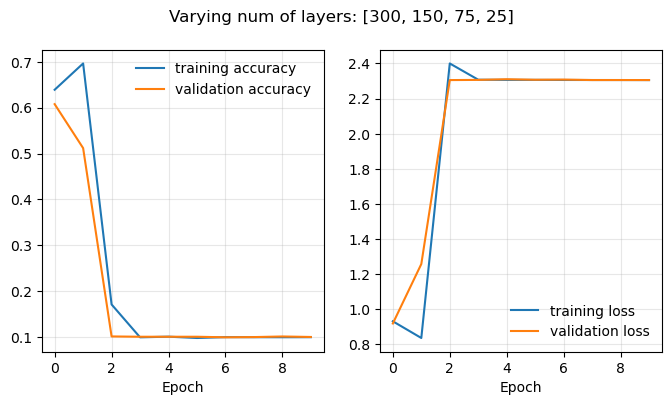

375/375 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1002


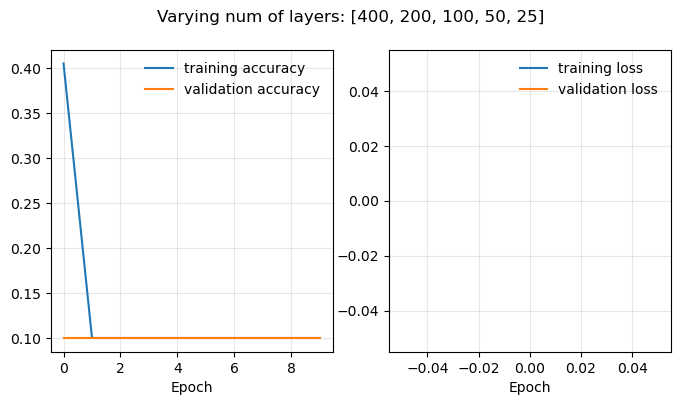

In [38]:
def models_varying_layers():
    """
    Vary number of layers
    """
    
    # get data
    X_train, X_val, y_train, y_val, X_test, y_test = prepare_data()
    
    # models with varying number of layers
    widths = [[300, 200, 100], [300, 150, 75, 25], [400, 200, 100, 50, 25]]
    models = [build_varying_layers_model(widths = width) for width in widths]
    optimizers = [set_optimizer() for _ in widths]
    histories = []
    times = []
    accuracy_loss = []
    
    for i in range(len(models)):
        # get model and history and training time as well as accuracy and loss on validation set
        start = time.time()
        model, history = train_models(models[i], optimizers[i], X_val, y_val)
        end = time.time()
        times.append(end - start)
        
        histories.append(history)
        models[i] = model
        accuracy_loss.append(model.evaluate(X_val, y_val))
        
        # plot histories
        plot_history(history, title='Varying num of layers: ' + str(widths[i]))
        
    return widths, models, optimizers, histories, times, accuracy_loss

varying_layers, models_layers, opt_layers, hist_layers, times_layers, accuracy_layers = models_varying_layers()

### Different number of epochs

In [ ]:
def models_varying_epochs():
    """
    Vary number of epochs
    """
    # get data
    X_train, X_val, y_train, y_val, X_test, y_test = prepare_data()
    
    # models with varying number of epochs
    widths = [[300, 100], [300, 100], [300, 100]]
    epochs = [5, 15, 20]
    models = [build_varying_layers_model(widths = width) for width in widths]
    optimizers = [set_optimizer() for _ in widths]
    histories = []
    times = []
    accuracy_loss = []
    
    for i in range(len(models)):
        # get model and history and training time as well as accuracy and loss on validation set
        start = time.time()
        model, history = train_models(models[i], optimizers[i], X_val, y_val, epochs=epochs[i])
        end = time.time()
        times.append(end - start)
        
        histories.append(history)
        models[i] = model
        accuracy_loss.append(model.evaluate(X_val, y_val))
        
        # plot histories
        plot_history(history, title='Varying num of epochs: ' + str(epochs[i]))
        
    return epochs, models, optimizers, histories, times, accuracy_loss

varying_epochs, models_epochs, opt_epochs, hist_epochs, times_epochs, accuracy_epochs = models_varying_epochs()
    
    

### Different number of batch sizes

375/375 [==============================] - 1s 2ms/step - loss: 2.3039 - accuracy: 0.1004


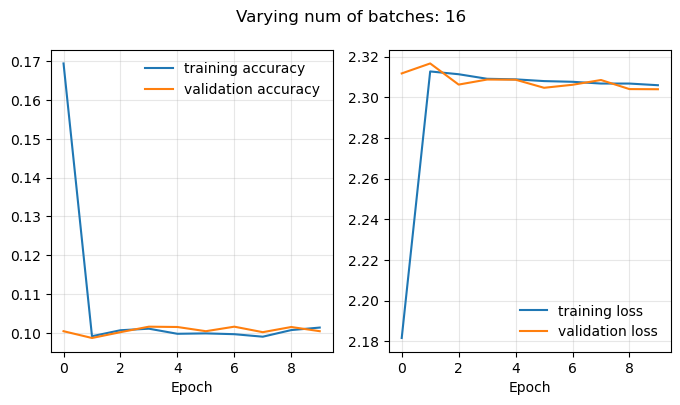

375/375 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8842


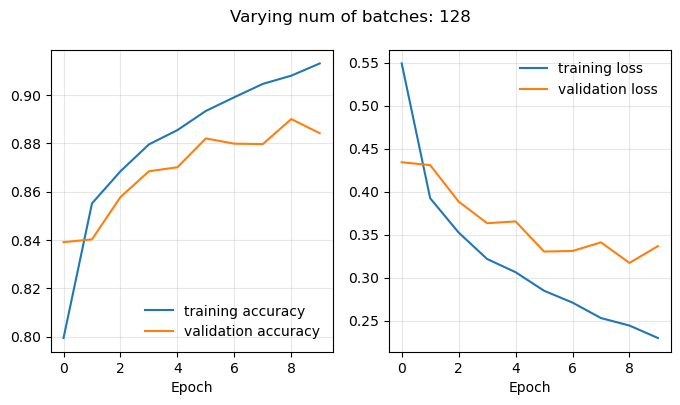

375/375 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8814


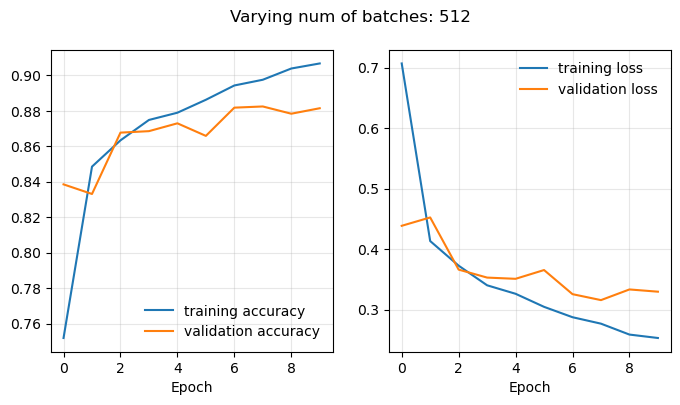

In [42]:
def models_varying_batch():
    """
    Vary number of batches
    """
    # get data
    X_train, X_val, y_train, y_val, X_test, y_test = prepare_data()
    
    # models with varying number of batch size
    widths = [[300, 100], [300, 100], [300, 100]]
    batches = [16, 128, 512]
    models = [build_varying_layers_model(widths = width) for width in widths]
    optimizers = [set_optimizer() for _ in widths]
    histories = []
    times = []
    accuracy_loss = []
    
    for i in range(len(models)):
        # get model and history and training time as well as accuracy and loss on validation set
        start = time.time()
        model, history = train_models(models[i], optimizers[i], X_val, y_val, batch_size=batches[i])
        end = time.time()
        times.append(end - start)
        
        histories.append(history)
        models[i] = model
        accuracy_loss.append(model.evaluate(X_val, y_val))
        
        # plot histories
        plot_history(history, title='Varying num of batches: ' + str(batches[i]))
        
    return batches, models, optimizers, histories, times, accuracy_loss

batch, models_batch, opt_batch, hist_batch, times_batch, accuracy_batch = models_varying_batch()

### Different learning rate, decay rate, momentum

375/375 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8827


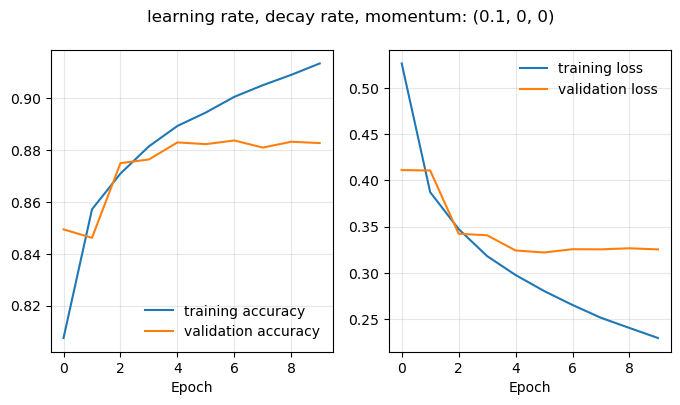

375/375 [==============================] - 1s 2ms/step - loss: 0.3072 - accuracy: 0.8903


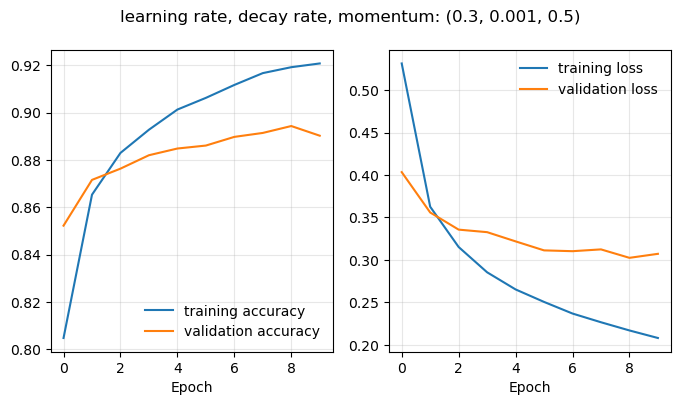

375/375 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1002


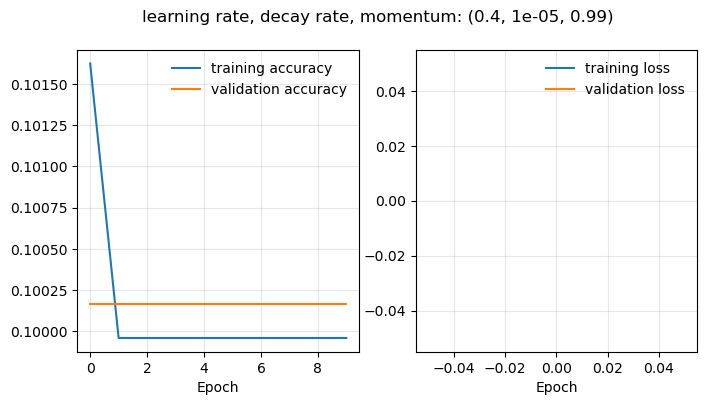

In [45]:
def models_vary_params():
    """
    We now vary the learnign rate, decay rate, and momentum
    """

    # get data
    X_train, X_val, y_train, y_val, X_test, y_test = prepare_data()
    
    # models with varying number of batch size
    widths = [[300, 100], [300, 100], [300, 100]]
    momentum = [0, 0.5, 0.99]
    learning_rate = [0.1, 0.3, 0.4]
    decay_rate = [0, 1e-3, 1e-5]
    models = [build_varying_layers_model(widths = width) for width in widths]
    optimizers = [set_optimizer(learning_rate=lr, decay=d, momentum=p) 
                  for lr, d, p in zip(learning_rate, decay_rate, momentum)]
    
    histories = []
    times = []
    accuracy_loss = []
    for i in range(len(models)):
        # get model and history and training time as well as accuracy and loss on validation set
        start = time.time()
        model, history = train_models(models[i], optimizers[i], X_val, y_val)
        end = time.time()
        times.append(end - start)
        
        histories.append(history)
        models[i] = model
        accuracy_loss.append(model.evaluate(X_val, y_val))
        
        # plot histories
        plot_history(history, title='learning rate, decay rate, momentum: ' + 
                     str((learning_rate[i], decay_rate[i], momentum[i])))
        
    return momentum, learning_rate, decay_rate, models, optimizers, histories, times, accuracy_loss

momentum, learning_rate, decay_rate, models_param,\
opt_param, hist_param, times_param, accuracy_parm = models_vary_params()


In [96]:
## refactor varying parameters into appropriate lists

refact = []
for m, lr, dr in zip(momentum, learning_rate, decay_rate):
    curr_param = [m, lr, dr]
    refact.append(curr_param)
    
#### Concatenate all lists together. 
model_names = ["width1", "width2", "width3", "layer1", "layer2", 
               "layer3", "epoch1", "epoch2", "epoch3", "batch1", 
               "batch2", "batch3", "param1", "param2", "param3"]


# index and name mapping for models
index_map = { i : name for i, name in enumerate(model_names)}
name_map = {name : i for i, name in enumerate(model_names)}


# get all models, histories, times, accuracies, etc. into one list
all_models = models_widths + models_layers + models_epochs + models_batch + models_param
all_histories = hist_widths + hist_layers + hist_epochs + hist_batch + hist_param
all_times = times_widths + times_layers + times_epochs + times_batch + times_param
all_opt = opt_widths + opt_layers + opt_epochs + opt_batch + opt_param
all_accuracy_loss = accuracy_widths + accuracy_layers + accuracy_epochs + accuracy_batch + accuracy_parm

all_accuracy = []
all_loss = []
for L in all_accuracy_loss:
    all_accuracy.append(L[-1])
    all_loss.append(L[0])

all_params = varying_widths + varying_layers + varying_epochs + batch + refact

all_models = np.array(all_models, dtype=object)
all_histories = np.array(all_histories, dtype=object)
all_times = np.array(all_times)
all_opt = np.array(all_opt, dtype=object)
all_accuracy = np.array(all_accuracy)
all_loss = np.array(all_loss)
all_params = np.array(all_params, dtype=object)

## Exercise 19.6
### Part 1

In [67]:
### Get fastest trained model

X_train, X_val, y_train, y_val, X_test, y_test = prepare_data()

fastest_trained_idx = np.argmin(all_times)
best_time = np.min(all_times)

print('Fastest trained model:', index_map[fastest_trained_idx])
print('Fastest training time:', str(round(best_time, 3)) + 's')
print('Changed parameters:', all_params[fastest_trained_idx])
print('This belonged to the varying batch times model of batchsize 512.')
print('Accuracy, Loss:', models_batch[model_idx].evaluate(X_test, y_test)[::-1])

Fastest trained model: batch3
Fastest training time: 7.232s
Changed parameters: 512
This belonged to the varying batch times model of batchsize 512.
313/313 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8723
Accuracy, Loss: [0.8723000288009644, 0.3570529520511627]


### Part 2

In [80]:
### Get best accuracy on validation set. 
idx_accurate_validation = np.nanargmax(all_accuracy)
best_accuracy = np.nanmax(all_accuracy)

print('Model with highest accuracy on validation set:', index_map[idx_accurate_validation])
print('Accuracy:', str(round(best_accuracy, 3))+'s')
print('Changed parameters:', all_params[idx_accurate_validation])
print('Loss, Accuracy on test set:')
all_models[idx_accurate_validation].evaluate(X_test, y_test)

Model with highest accuracy on validation set: param2
Accuracy: 0.89s
Changed parameters: [0.5, 0.3, 0.001]
Loss, Accuracy on test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8865


[0.3331322968006134, 0.8865000009536743]

### Part 3

In [112]:
best_test_accuracy = -np.inf
opt_idx = None
best_model = None
for idx, model in enumerate(all_models):
    loss, accuracy = model.evaluate(X_test, y_test)
    if accuracy > best_test_accuracy:
        best_model = model
        best_test_accuracy = accuracy
        opt_idx = idx
        
        
    
print('Best model:', index_map[opt_idx])
print('Changed Params [momentum, learning rate, decay]:', all_params[opt_idx])
print('Test accuracy', best_test_accuracy)
print('Validation accuracy:')
best_model.evaluate(X_val, y_val)



313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1000
Best model: param2
Changed Params [momentum, learning rate, decay]: [0.5, 0.3, 0.001]
Test accuracy 0.8865000009536743
Validation accuracy:
375/375 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8903


[0.3072054088115692, 0.890250027179718]

### Part 4

In [108]:
mask = np.array(all_accuracy) > 0.85
appropriate_models = all_models[mask]
appropriate_times = all_times[mask]
best_time_idx = np.argmin(appropriate_times)
best_time = np.min(appropriate_times)

idx = 1
idx_app = 0
for val in mask:
    if val:
        idx_app += 1
        
    idx += 1
    
    if idx_app == best_time_idx:
        break
        
print('Best model:', index_map[idx])
print('Changed parameters [momentum, learning rate, decay]: ', all_params[idx])
print('Fastest time:' + str(round(best_time, 3)) +'s')
print('Loss, Accuracy of fastest model:')
appropriate_models[best_time_idx].evaluate(X_test, y_test)



Best model: param1
Changed parameters [momentum, learning rate, decay]:  [0, 0.1, 0]
Fastest time:7.232s
Loss, Accuracy of fastest model:
313/313 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8723


[0.3570529520511627, 0.8723000288009644]

### Part 5

In [118]:
### Look at all the summaries (of models with at least 85%) to find model with fewest params:

for model in appropriate_models:
    model.summary()
    
### The best model is the 3rd model of the appropriate ones (2nd index)

print()
print('Model with fewest parameters: ', index_map[2])
print('Changed paramaters: ', all_params[2])
print('Accuracy on test set: ')
all_models[2].evaluate(X_test, y_test)




Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_75 (Flatten)        (None, 784)               0         
                                                                 
 dense_225 (Dense)           (None, 300)               235500    
                                                                 
 dense_226 (Dense)           (None, 200)               60200     
                                                                 
 dense_227 (Dense)           (None, 10)                2010      
                                                                 
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_76 (Flatten)   

313/313 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8486


[0.43202412128448486, 0.8485999703407288]

## Exercise 19.7

For me this happened on model indexes 0, 1, 3, 10, 11

In [120]:
indexes = [0, 1, 3, 10, 11]

for idx in indexes:
    print('Model:' , index_map[idx])
    print('Params changed:', all_params[idx])
    print('Loss/Accuracy on test set: ')
    all_models[idx].evaluate(X_test, y_test)

Model: width1
Params changed: [300, 200]
Loss/Accuracy on test set: 
313/313 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8613
Model: width2
Params changed: [250, 75]
Loss/Accuracy on test set: 
313/313 [==============================] - 1s 2ms/step - loss: 0.3833 - accuracy: 0.8645
Model: layer1
Params changed: [300, 200, 100]
Loss/Accuracy on test set: 
313/313 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8538
Model: batch2
Params changed: 128
Loss/Accuracy on test set: 
313/313 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8728
Model: batch3
Params changed: 512
Loss/Accuracy on test set: 
313/313 [==============================] - 1s 2ms/step - loss: 0.3571 - accuracy: 0.8723
